# Data Analysis for a UK Online Retail Store

In [250]:
import pandas as pd

# Define the path to the datasets
path_to_online_retail_data = "./Dataset/online_retail_II.xlsx"
path_to_cpi_data = "./Dataset/series_061223.xls"

# Load data
retail_2a = pd.read_excel(path_to_online_retail_data, sheet_name="Year 2009-2010")
retail_2b = pd.read_excel(path_to_online_retail_data, sheet_name="Year 2010-2011")
CPI_data = pd.read_excel(path_to_cpi_data)

# Merge data
retail = pd.concat([retail_2a, retail_2b])
print(retail.columns)

# Print original shape
print("Original Retail Data Shape: ", retail.shape)

# Remove duplicates
retail.drop_duplicates(subset=['Invoice', 'StockCode'], inplace=True)

# Check new shape
print("New Retail Data Shape after removing duplicates: ", retail.shape)


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
Original Retail Data Shape:  (1067371, 8)
New Retail Data Shape after removing duplicates:  (1021424, 8)


In [251]:
# Print column names for retail data
print("Columns in Retail Data:")
print(retail.columns)

# Print column names for CPI data
print("Columns in CPI Data:")
print(CPI_data.columns)

Columns in Retail Data:
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
Columns in CPI Data:
Index(['Title', 'CPI INDEX 00: ALL ITEMS 2015=100'], dtype='object')


In [252]:
# Show first 10 rows of retail and CPI data to check the columns and the types of data in the dataframe
print(retail.head(10))

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00      7       13,085  United Kingdom  
1 2009-12-01 07:45:00      7       13,085  United Kingdom  
2 2009-12-01 07:45:00      7       13,085  United

In [253]:
print(CPI_data.head(10))

               Title CPI INDEX 00: ALL ITEMS 2015=100
0               CDID                             D7BT
1  Source dataset ID                             MM23
2            PreUnit                              NaN
3               Unit           Index, base year = 100
4       Release date                       15-11-2023
5       Next release                 20 December 2023
6    Important notes                              NaN
7               1988                               50
8               1989                               52
9               1990                               56


In [254]:
#CPI actual information seems to start from the 7th Index (0 based index). 
#Data before 7 index is meta information is about the data
#Therefore, skip the first 7 rows and set the column names
CPI_data = pd.read_excel(r"C:\Christine\Data Analytics\UK Retail stores testing\Dataset\series_061223.xls", header=7, names=["Year", "CPI"])
# Display the newly cleaned CPI Data
print(CPI_data.head(10))

   Year  CPI
0  1988   50
1  1989   52
2  1990   56
3  1991   60
4  1992   63
5  1993   64
6  1994   66
7  1995   67
8  1996   69
9  1997   70


In [255]:
#Joining CPI information and Retail Data
# Extract the year from InvoiceDate in retail data
retail['Year'] = retail['InvoiceDate'].dt.year

# Convert Year in retail dataframe to int type to match with CPI_data's Year
retail['Year'] = retail['Year'].astype(int)

# Convert 'Year' in CPI_data to string, then extract the year part 
# and convert it to int type
CPI_data['Year'] = CPI_data['Year'].astype(str).str.slice(0, 4).astype(int)

# Merge the CPI data and retail data on 'Year'
retail_CPI = pd.merge(retail, CPI_data, on='Year', how='left')

# Print the first 5 rows of the new dataframe
print(retail_CPI.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
2  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
3  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
4  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   

          InvoiceDate  Price  Customer ID         Country  Year  CPI  
0 2009-12-01 07:45:00      7       13,085  United Kingdom  2009   87  
1 2009-12-01 07:45:00      7       13,085  United Kingdom  2009   85  
2 2009-12-01 07:45:00      7       13,085  United Kingdom  2009   86  
3 2009-12-01 07:45:00      7       13,085  United Kingdom  2009   87  
4 2009-12-01 07:45:00      7       13,085  United Kingdom  2009   88  


In [256]:
#Conduct Descriptive Analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(retail_CPI.describe())


        Quantity                    InvoiceDate      Price  Customer ID  \
count 17,364,208                       17364208 17,364,208   13,382,281   
mean          10  2011-01-03 13:28:54.460203776          5       15,307   
min      -80,995            2009-12-01 07:45:00    -53,594       12,346   
25%            1            2010-07-05 11:11:00          1       13,952   
50%            3            2010-12-09 14:09:00          2       15,214   
75%           10            2011-07-27 09:32:00          4       16,784   
max       80,995            2011-12-09 12:50:00     38,970       18,287   
std          176                            NaN        123        1,697   

            Year        CPI  
count 17,364,208 17,364,208  
mean       2,010         91  
min        2,009         85  
25%        2,010         89  
50%        2,010         91  
75%        2,011         93  
max        2,011         95  
std            1          2  


In [257]:
# Correlation analysis
# Select only numeric columns for correlation analysis
numeric_cols = retail_CPI.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_cols.corr()
# Print the correlation matrix
print(corr)


             Quantity  Price  Customer ID  Year  CPI
Quantity            1     -0           -0    -0   -0
Price              -0      1           -0    -0   -0
Customer ID        -0     -0            1    -0   -0
Year               -0     -0           -0     1    1
CPI                -0     -0           -0     1    1


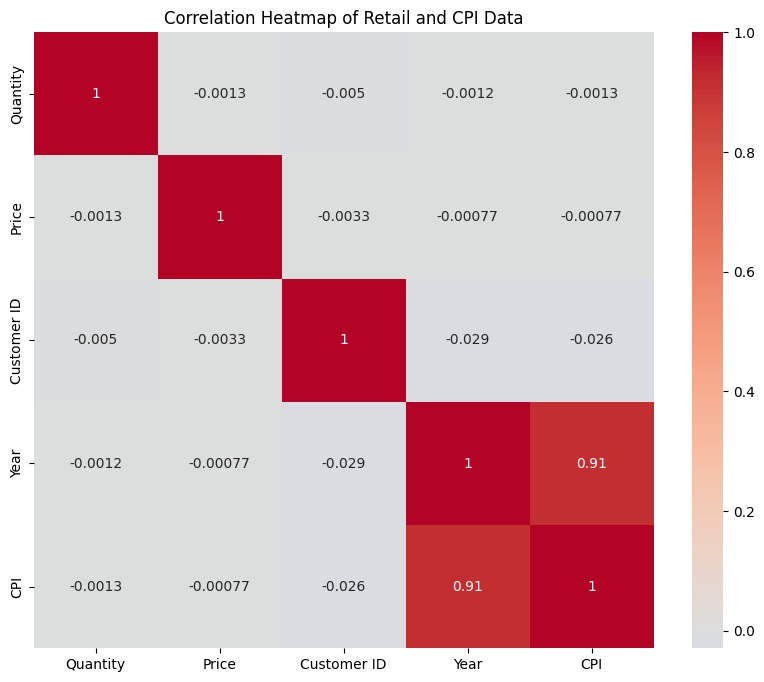

In [258]:
# Plot a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap of Retail and CPI Data')
plt.show()

In [259]:
# Calculate the correlation between 'Quantity' and 'CPI'
correlation = retail_CPI['Quantity'].corr(retail_CPI['CPI'])
# Print correlation coefficients and interpretation
if correlation > 0:
    print(f"The correlation between Quantity and CPI is approximately {correlation}.Since the correlation coefficient is positive, this indicates that there is a direct relationship between the quantity of products sold and the Consumer Price Index. As CPI increases, so does the Quantity of products sold, and vice-versa.")
else:
    print(f"The correlation between Quantity and CPI is approximately {correlation}. Since the correlation coefficient is very close to 0, this indicates there is virtually no linear relationship between the quantity of products sold and the Consumer Price Index.")

The correlation between Quantity and CPI is approximately -0.0012813673128840302. Since the correlation coefficient is very close to 0, this indicates there is virtually no linear relationship between the quantity of products sold and the Consumer Price Index.


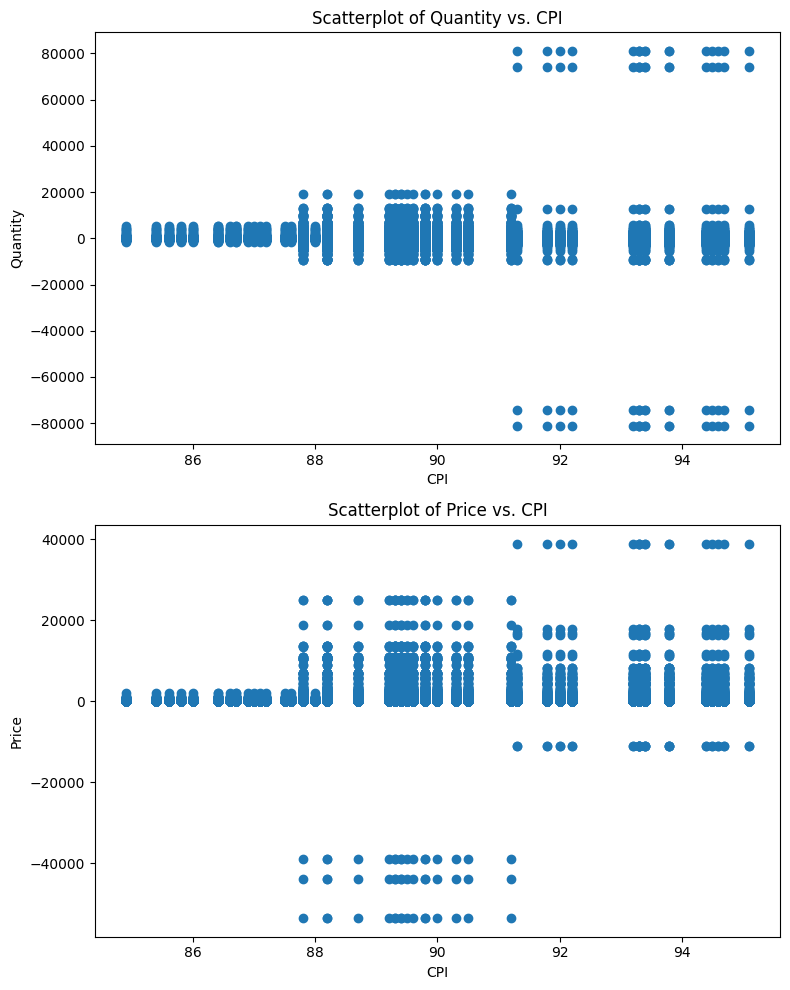

In [208]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, figsize=(8, 10))

# Scatter plot for Quantity vs. CPI
axs[0].scatter(retail_CPI['CPI'], retail_CPI['Quantity'])
axs[0].set_xlabel('CPI')
axs[0].set_ylabel('Quantity')
axs[0].set_title('Scatterplot of Quantity vs. CPI')

# Scatter plot for Price vs. CPI
axs[1].scatter(retail_CPI['CPI'], retail_CPI['Price'])
axs[1].set_xlabel('CPI')
axs[1].set_ylabel('Price')
axs[1].set_title('Scatterplot of Price vs. CPI')

# Display the plot
plt.tight_layout()
plt.show()

In [209]:
# Check the item groupings based on the 'Description' column
item_grouping = retail_CPI.groupby('Description').size()

# Print the item grouping
print(item_grouping)

Description
20713                                    17
21494                                    17
22467                                    17
22719                                    17
  DOORMAT UNION JACK GUNS AND ROSES    1020
                                       ... 
wrongly marked carton 22804              17
wrongly marked. 23343 in box             17
wrongly sold (22719) barcode             17
wrongly sold as sets                     17
wrongly sold sets                        17
Length: 5698, dtype: int64


In [210]:
# Most sold items/ top 10
#Group by items (use 'Description' or 'StockCode', depending on your case)
# Sum the 'Quantity' for each item, sort in descending order, and get the first 10
top_10_items = retail_CPI.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Print the result
print(top_10_items)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     1777163
WHITE HANGING HEART T-LIGHT HOLDER    1535967
ASSORTED COLOUR BIRD ORNAMENT         1347437
JUMBO BAG RED RETROSPOT               1297066
BROCADE RING PURSE                    1113789
PACK OF 60 PINK PAISLEY CAKE CASES     945421
60 TEATIME FAIRY CAKE CASES            907018
SMALL POPCORN HOLDER                   817683
PACK OF 72 RETROSPOT CAKE CASES        809404
PACK OF 72 RETRO SPOT CAKE CASES       781524
Name: Quantity, dtype: int64


In [211]:
# Group the data by 'Description', sum 'Quantity' for each group, sort them in descending order and select top 10
top_10_items = retail_CPI.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Print the result
print(top_10_items)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     1777163
WHITE HANGING HEART T-LIGHT HOLDER    1535967
ASSORTED COLOUR BIRD ORNAMENT         1347437
JUMBO BAG RED RETROSPOT               1297066
BROCADE RING PURSE                    1113789
PACK OF 60 PINK PAISLEY CAKE CASES     945421
60 TEATIME FAIRY CAKE CASES            907018
SMALL POPCORN HOLDER                   817683
PACK OF 72 RETROSPOT CAKE CASES        809404
PACK OF 72 RETRO SPOT CAKE CASES       781524
Name: Quantity, dtype: int64


In [212]:
# Calculate total revenue for each item
retail_CPI['Revenue'] = retail_CPI['Quantity'] * retail_CPI['Price']

# Group by 'Description', sum 'Revenue' for each item, sort in descending order, and get the top 10
top_10_items_revenue = retail_CPI.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

# Print the result
print(top_10_items_revenue)

Description
REGENCY CAKESTAND 3 TIER              5,310,233
DOTCOM POSTAGE                        5,267,350
WHITE HANGING HEART T-LIGHT HOLDER    4,244,706
PARTY BUNTING                         2,486,716
JUMBO BAG RED RETROSPOT               2,473,360
ASSORTED COLOUR BIRD ORNAMENT         2,176,221
PAPER CHAIN KIT 50'S CHRISTMAS        1,964,143
POSTAGE                               1,878,739
CHILLI LIGHTS                         1,355,184
ROTATING SILVER ANGELS T-LIGHT HLDR   1,201,287
Name: Revenue, dtype: float64


In [213]:
# Top 10 items by Quantity
top_10_quantity = retail_CPI.groupby('Description')['Quantity'].sum().nlargest(10)

# Top 10 items by Revenue
retail_CPI['Revenue'] = retail_CPI['Quantity'] * retail_CPI['Price']
top_10_revenue = retail_CPI.groupby('Description')['Revenue'].sum().nlargest(10)

# Create DataFrame for comparison
comparison_df = pd.DataFrame(data={'Top_10_Quantity': top_10_quantity.index, 
                                   'Top_10_Revenue': top_10_revenue.index})

# Print the DataFrame
print(comparison_df)

                      Top_10_Quantity                       Top_10_Revenue
0   WORLD WAR 2 GLIDERS ASSTD DESIGNS             REGENCY CAKESTAND 3 TIER
1  WHITE HANGING HEART T-LIGHT HOLDER                       DOTCOM POSTAGE
2       ASSORTED COLOUR BIRD ORNAMENT   WHITE HANGING HEART T-LIGHT HOLDER
3             JUMBO BAG RED RETROSPOT                        PARTY BUNTING
4                 BROCADE RING PURSE               JUMBO BAG RED RETROSPOT
5  PACK OF 60 PINK PAISLEY CAKE CASES        ASSORTED COLOUR BIRD ORNAMENT
6         60 TEATIME FAIRY CAKE CASES      PAPER CHAIN KIT 50'S CHRISTMAS 
7                SMALL POPCORN HOLDER                              POSTAGE
8     PACK OF 72 RETROSPOT CAKE CASES                        CHILLI LIGHTS
9    PACK OF 72 RETRO SPOT CAKE CASES  ROTATING SILVER ANGELS T-LIGHT HLDR


In [214]:
# Compute total Quantity and Revenue for each item
item_data = retail_CPI.groupby('Description').agg({'Quantity': 'sum', 'Revenue': 'sum'})

# Create composite score as a weighted sum of normalized Quantity and Revenue
item_data['Quantity_norm'] = (item_data['Quantity'] - item_data['Quantity'].min()) / (item_data['Quantity'].max() - item_data['Quantity'].min())
item_data['Revenue_norm'] = (item_data['Revenue'] - item_data['Revenue'].min()) / (item_data['Revenue'].max() - item_data['Revenue'].min())
item_data['Score'] = 0.5 * item_data['Quantity_norm'] + 0.5 * item_data['Revenue_norm']  # adjust weights as needed

# Rank items based on the composite score
item_data['Rank'] = item_data['Score'].rank(ascending=False)

# Determine average price of each item
item_data['AvgPrice'] = item_data['Revenue'] / item_data['Quantity']

# Categorize items into price ranges based on average price percentiles
item_data['PriceCategory'] = pd.qcut(item_data['AvgPrice'], q=[0, .2, .8, 1], labels=['Low cost', 'Mid range', 'Premium'])

# Print the result
print(item_data.sort_values('Score', ascending=False).head(10))

                                    Quantity   Revenue  Quantity_norm  \
Description                                                             
WHITE HANGING HEART T-LIGHT HOLDER   1535967 4,244,706              1   
JUMBO BAG RED RETROSPOT              1297066 2,473,360              1   
ASSORTED COLOUR BIRD ORNAMENT        1347437 2,176,221              1   
WORLD WAR 2 GLIDERS ASSTD DESIGNS    1777163   409,394              1   
REGENCY CAKESTAND 3 TIER              424048 5,310,233              0   
DOTCOM POSTAGE                         24089 5,267,350              0   
BROCADE RING PURSE                   1113789   233,982              1   
PARTY BUNTING                         472226 2,486,716              0   
PAPER CHAIN KIT 50'S CHRISTMAS        582233 1,964,143              0   
PACK OF 60 PINK PAISLEY CAKE CASES    945421   473,516              1   

                                    Revenue_norm  Score  Rank  AvgPrice  \
Description                                     

In [215]:
# Top 10 items by Quantity
top_10_quantity = set(retail_CPI.groupby('Description')['Quantity'].sum().nlargest(10).index)

# Calculate the total revenue for each item
retail_CPI['Revenue'] = retail_CPI['Quantity'] * retail_CPI['Price']

# Top 10 items by Revenue
top_10_revenue = set(retail_CPI.groupby('Description')['Revenue'].sum().nlargest(10).index)

# Find items in top 10 by quantity but not by revenue
quantity_not_revenue = top_10_quantity.difference(top_10_revenue)

# Find items in top 10 by revenue but not by quantity
revenue_not_quantity = top_10_revenue.difference(top_10_quantity)

print("Items in top 10 by quantity but not by revenue:")
print(quantity_not_revenue)

print("\nItems in top 10 by revenue but not by quantity:")
print(revenue_not_quantity)

Items in top 10 by quantity but not by revenue:
{'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'PACK OF 72 RETRO SPOT CAKE CASES', '60 TEATIME FAIRY CAKE CASES', 'SMALL POPCORN HOLDER', 'BROCADE RING PURSE ', 'PACK OF 60 PINK PAISLEY CAKE CASES', 'PACK OF 72 RETROSPOT CAKE CASES'}

Items in top 10 by revenue but not by quantity:
{"PAPER CHAIN KIT 50'S CHRISTMAS ", 'ROTATING SILVER ANGELS T-LIGHT HLDR', 'REGENCY CAKESTAND 3 TIER', 'CHILLI LIGHTS', 'POSTAGE', 'DOTCOM POSTAGE', 'PARTY BUNTING'}


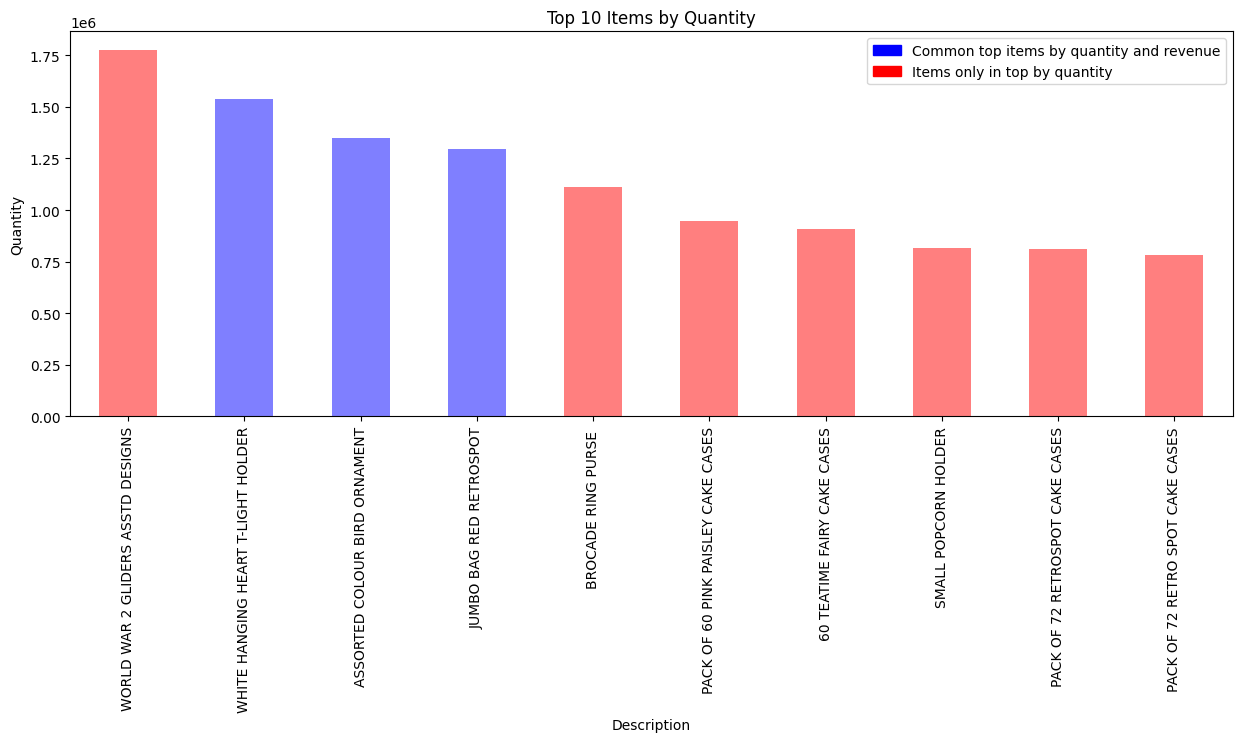

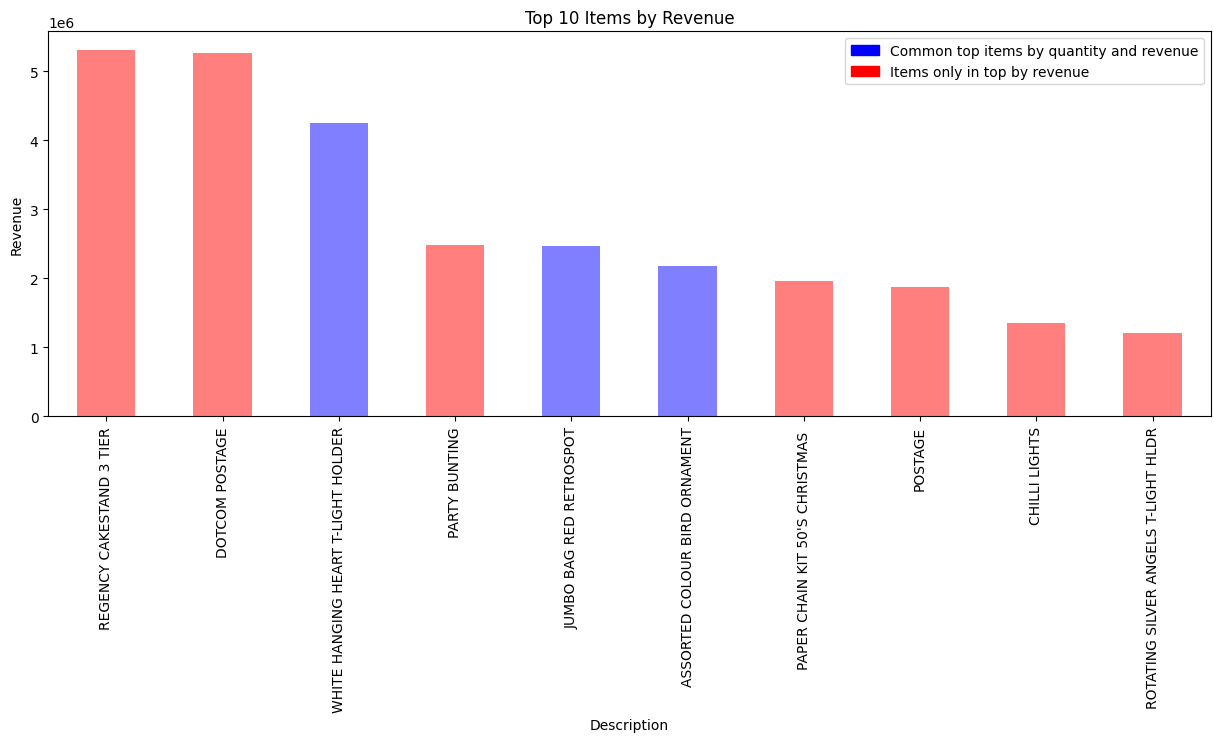

In [216]:
import matplotlib.patches as mpatches

# Define common_items, top_10_quantity_series, top_10_revenue_series
common_items = top_10_quantity.intersection(top_10_revenue)
top_10_quantity_series = retail_CPI[retail_CPI['Description'].isin(top_10_quantity)].groupby('Description')['Quantity'].sum().sort_values(ascending=False)
top_10_revenue_series = retail_CPI[retail_CPI['Description'].isin(top_10_revenue)].groupby('Description')['Revenue'].sum().sort_values(ascending=False)

# Create bar plots with color-coding for discrepancies

plt.figure(figsize=(15,5))
colors_quantity = ['blue' if item in common_items else 'red' for item in top_10_quantity_series.index]
top_10_quantity_series.plot(kind='bar', color=colors_quantity, alpha=0.5)
plt.title("Top 10 Items by Quantity")
plt.ylabel("Quantity")

blue_patch = mpatches.Patch(label='Common top items by quantity and revenue', color='blue')
red_patch = mpatches.Patch(label='Items only in top by quantity', color='red')

plt.legend(handles=[blue_patch, red_patch])
plt.show()

plt.figure(figsize=(15,5))
colors_revenue = ['blue' if item in common_items else 'red' for item in top_10_revenue_series.index]
top_10_revenue_series.plot(kind='bar', color=colors_revenue, alpha=0.5)
plt.title("Top 10 Items by Revenue")
plt.ylabel("Revenue")

blue_patch = mpatches.Patch(label='Common top items by quantity and revenue', color='blue')
red_patch = mpatches.Patch(label='Items only in top by revenue', color='red')

plt.legend(handles=[blue_patch, red_patch])
plt.show()

In [217]:
# Get the average unit price for each product
average_prices = retail_CPI.groupby('Description')['Price'].mean()

# Get the average price for 'blue-patch' items - high demand, high revenue items
common_prices = average_prices[average_prices.index.isin(common_items)]

# Get average unit price across all products
average_price_all = retail_CPI['Price'].mean()

print("Average price of top items: \n", common_prices)
print("\nAverage price across all items: ", average_price_all)

# Arbitrary threshold for defining "substantially higher"
threshold = 1.10 

# Check if the average price of blue-patch items is substantially higher than the average price across all products.
if common_prices.mean() > threshold * average_price_all:
    print("\nThe average price of top items by both quantity and revenue is substantially higher than the average price across all items. This suggests that a 'Premium Pricing Strategy' might be contributing to their high revenue.")
else:
    print("\nThe average price of top items by both quantity and revenue is not substantially higher than the average price across all items. This suggests that 'High Demand' is the major factor driving the high quantity and revenue of these items.")

Average price of top items: 
 Description
ASSORTED COLOUR BIRD ORNAMENT        2
JUMBO BAG RED RETROSPOT              2
WHITE HANGING HEART T-LIGHT HOLDER   3
Name: Price, dtype: float64

Average price across all items:  4.6192953043985625

The average price of top items by both quantity and revenue is not substantially higher than the average price across all items. This suggests that 'High Demand' is the major factor driving the high quantity and revenue of these items.


Common customers who are in the top 5 by both quantity and revenue: {14156.0, 14646.0, 18102.0}

The above customer(s) are the ones who are not only purchasing in high quantities but also contributing significantly to the revenue.


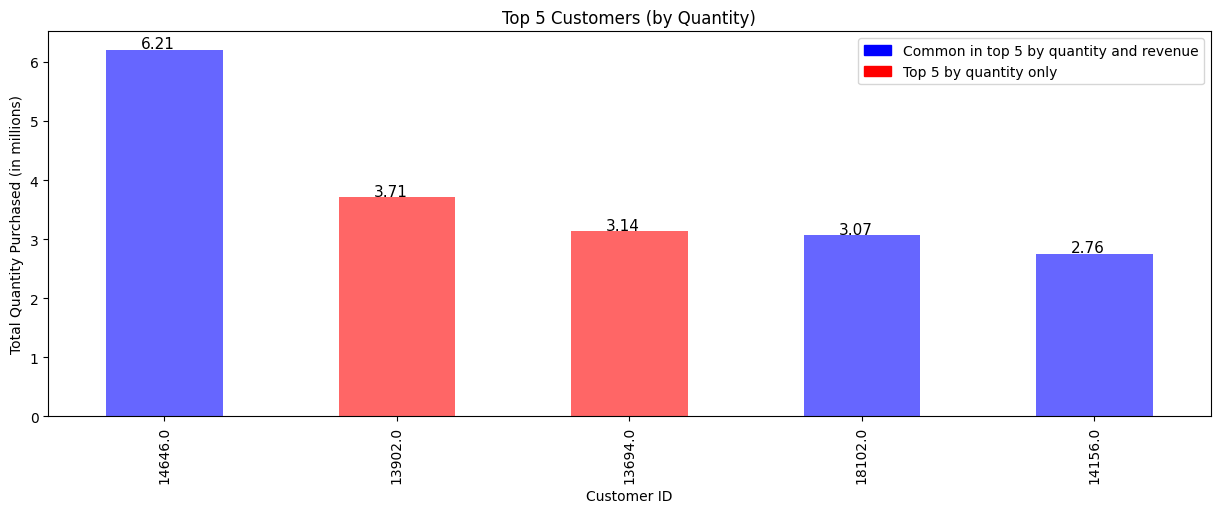

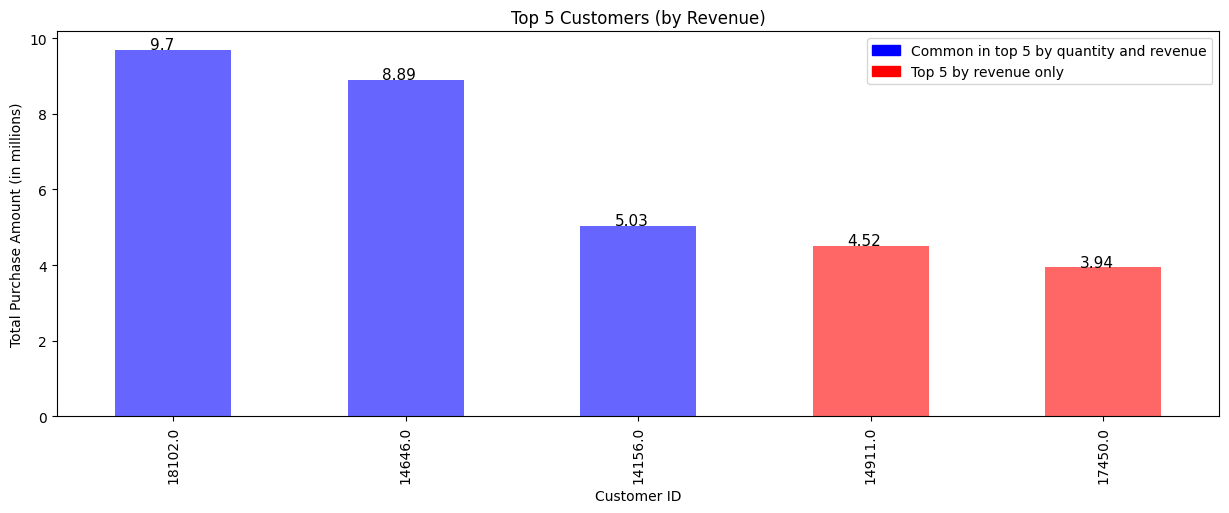

In [218]:
#Perform per-customer analysis by identifying the top 5 customers who make the highest purchases. This analysis considers both the quantity of items bought and the total amount spent by each customer.
# Identify top 5 customers based on quantity
# Considering 'CustomerID' as your customer identifier column
customer_data = retail_CPI.groupby('Customer ID').agg({'Quantity':'sum', 'Revenue':'sum'})
top_quantity_customers_id = set(customer_data['Quantity'].nlargest(5).index)
top_quantity_customers = customer_data['Quantity'].nlargest(5) / 1000000 # Data in millions

# Identify top 5 customers based on revenue
top_revenue_customers_id = set(customer_data['Revenue'].nlargest(5).index)
top_revenue_customers = customer_data['Revenue'].nlargest(5) / 1000000 # Data in millions

# Find common customers who are in top 5 by both quantity and revenue
common_customers = top_quantity_customers_id.intersection(top_revenue_customers_id)

print(f"Common customers who are in the top 5 by both quantity and revenue: {common_customers}")

if len(common_customers) > 0:
    print("\nThe above customer(s) are the ones who are not only purchasing in high quantities but also contributing significantly to the revenue.")
else:
    print("\nThere are no common customers who are in the top 5 by both quantity and revenue.")

# Visualization of data in millions

plt.figure(figsize=(15,5))
colors_quantity = ['blue' if customer in common_customers else 'red' for customer in top_quantity_customers.index]
ax = top_quantity_customers.plot(kind='bar', color=colors_quantity, alpha=0.6)
plt.title('Top 5 Customers (by Quantity)')
plt.ylabel('Total Quantity Purchased (in millions)')

blue_patch = mpatches.Patch(color='blue', label='Common in top 5 by quantity and revenue')
red_patch = mpatches.Patch(color='red', label='Top 5 by quantity only')
plt.legend(handles=[blue_patch, red_patch])

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()+0.02, str(round(i.get_height(), 2)), fontsize=11)

plt.show()

plt.figure(figsize=(15,5))
colors_revenue = ['blue' if customer in common_customers else 'red' for customer in top_revenue_customers.index]
ax = top_revenue_customers.plot(kind='bar', color=colors_revenue, alpha=0.6)
plt.title('Top 5 Customers (by Revenue)')
plt.ylabel('Total Purchase Amount (in millions)')

blue_patch = mpatches.Patch(color='blue', label='Common in top 5 by quantity and revenue')
red_patch = mpatches.Patch(color='red', label='Top 5 by revenue only')
plt.legend(handles=[blue_patch, red_patch])

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()+0.02, str(round(i.get_height(), 2)), fontsize=11)

plt.show()

In [219]:
import os
# Get a list of the common customers
common_customers_list = list(common_customers)

# Filter the dataframe to include only transactions by the common customers
top_customers_purchases = retail_CPI[retail_CPI['Customer ID'].isin(common_customers_list)]

# Group by customer and description to see quantity of each item bought by each customer
items_bought_by_customers = top_customers_purchases.groupby(['Customer ID', 'Description'])['Quantity'].sum()

print(items_bought_by_customers)

# Write the output to an excel file
items_bought_by_customers.to_excel('top_customers_purchases.xlsx')

Customer ID  Description                      
14,156        4 PURPLE FLOCK DINNER CANDLES        102
              CHERRY BLOSSOM  DECORATIVE FLASK    3468
              HOME SWEET HOME  BLACKBOARD           51
              IVORY PAPER CUP CAKE CASES          8160
              RED/WHITE DOT MINI CASES              34
                                                  ... 
18,102       WOODLAND STORAGE BOX SMALL           1632
             YELLOW COAT RACK PARIS FASHION       1224
             YELLOW POT PLANT CANDLE              5304
             ZINC HEART LATTICE DOUBLE PLANTER     816
             ZINC POLICE BOX LANTERN              3179
Name: Quantity, Length: 3046, dtype: int64


In [220]:
# Calculate the correlation
quantity_revenue_correlation = customer_data['Quantity'].corr(customer_data['Revenue'])

print(f"The correlation between Quantity and Revenue is: {quantity_revenue_correlation}\n")

# Interpret the results
if quantity_revenue_correlation > 0.5:
    print("Result: There is a strong positive correlation between the quantity purchased by customers and the revenue. It suggests that customers who purchase more quantities tend to contribute more to the revenue.")
elif quantity_revenue_correlation < -0.5:
    print("Result: There is a strong negative correlation between the quantity purchased by customers and the revenue. It suggests that customers who purchase more quantities do not necessarily contribute more to the revenue, likely because they are buying low value items.")
else:
    print("Result: There is no significant correlation between the quantity purchased by customers and the revenue. It suggests that the quantity of items bought by customers does not have a substantial effect on the revenue.")

The correlation between Quantity and Revenue is: 0.8776883957151805

Result: There is a strong positive correlation between the quantity purchased by customers and the revenue. It suggests that customers who purchase more quantities tend to contribute more to the revenue.


In [221]:
# Calculate and interpret Quantity stats
quantity_mean = customer_data['Quantity'].mean()
quantity_std = customer_data['Quantity'].std()
quantity_median = customer_data['Quantity'].median()

print(f"Mean quantity purchased: {quantity_mean}")
print(f"Standard deviation of quantity purchased: {quantity_std}")
print(f"Median quantity purchased: {quantity_median}")

if quantity_std > quantity_mean:
    print("The standard deviation is greater than the mean, suggesting high variability and potential presence of outliers in the data.\n")
elif quantity_mean > quantity_median:
    print("The mean is greater than the median, indicating the data is likely skewed with potential presence of high outliers.\n")
else:
    print("The data appears to be relatively consistent in terms of quantity purchased by customers.\n")

# Calculate and interpret Revenue stats
revenue_mean = customer_data['Revenue'].mean()
revenue_std = customer_data['Revenue'].std()
revenue_median = customer_data['Revenue'].median()

print(f"Mean revenue: {revenue_mean}")
print(f"Standard deviation of revenue: {revenue_std}")
print(f"Median revenue: {revenue_median}")

if revenue_std > revenue_mean:
    print("The standard deviation is greater than the mean, suggesting high variability and potential presence of outliers in the data.\n")
elif revenue_mean > revenue_median:
    print("The mean is greater than the median, indicating the data is likely skewed with potential presence of high outliers.\n")
else:
    print("The data appears to be relatively consistent in terms of revenue from customers.\n")

Mean quantity purchased: 28624.69841804106
Standard deviation of quantity purchased: 144134.06155598006
Median quantity purchased: 7769.0
The standard deviation is greater than the mean, suggesting high variability and potential presence of outliers in the data.

Mean revenue: 46392.10118293505
Standard deviation of revenue: 232398.00063036743
Median revenue: 13867.41
The standard deviation is greater than the mean, suggesting high variability and potential presence of outliers in the data.



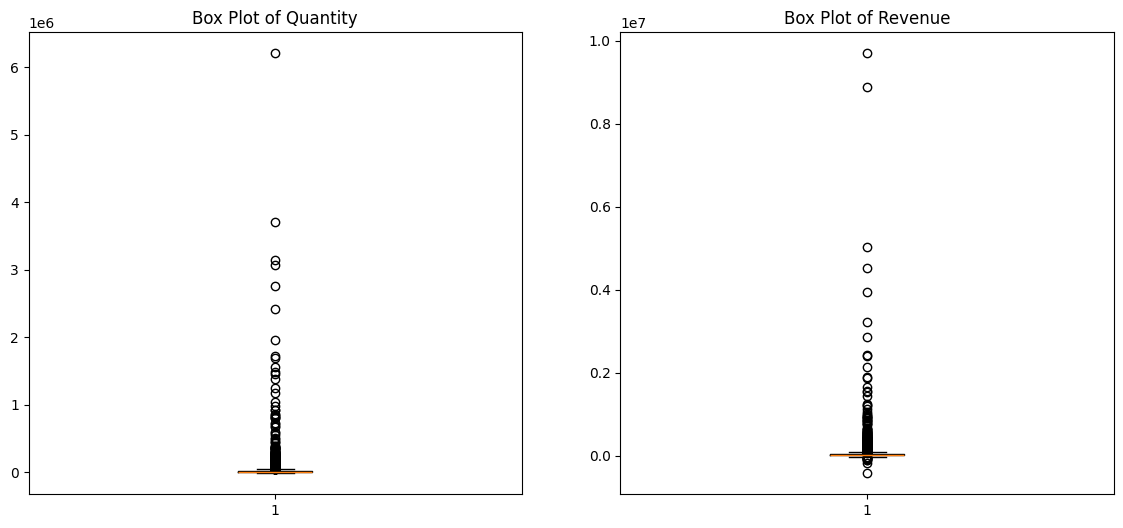

In [222]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Box plot for Quantity
plt.subplot(1, 2, 1) 
plt.boxplot(customer_data['Quantity'])
plt.title('Box Plot of Quantity')

# Box plot for Revenue
plt.subplot(1, 2, 2)
plt.boxplot(customer_data['Revenue'])
plt.title('Box Plot of Revenue')

plt.show()

In [223]:
# Calculate Revenue for each transaction
retail_CPI['Revenue'] = retail_CPI['Quantity'] * retail_CPI['Price']

# Convert InvoiceDate to date (removing time)
retail_CPI['InvoiceDate'] = pd.to_datetime(retail_CPI['InvoiceDate']).dt.date

# Calculate daily Revenue
daily_revenue = retail_CPI.groupby('InvoiceDate')['Revenue'].sum().reset_index()

# Display first few rows
print(daily_revenue.head())

  InvoiceDate   Revenue
0  2009-12-01   897,331
1  2009-12-02 1,058,482
2  2009-12-03 1,168,112
3  2009-12-04   678,282
4  2009-12-05   166,652


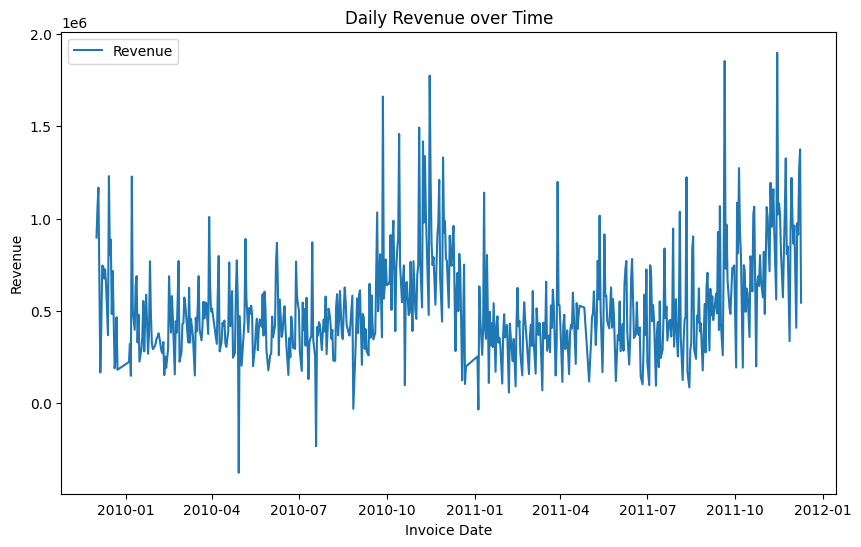

In [224]:
# Calculate Revenue for each transaction
retail_CPI['Revenue'] = retail_CPI['Quantity'] * retail_CPI['Price']

# Convert InvoiceDate to date (removing time)
retail_CPI['InvoiceDate'] = pd.to_datetime(retail_CPI['InvoiceDate']).dt.date

# Calculate daily Revenue
daily_revenue = retail_CPI.groupby('InvoiceDate')['Revenue'].sum().reset_index()

# Plotting the daily revenue over time
plt.figure(figsize=(10,6))
plt.plot(daily_revenue['InvoiceDate'], daily_revenue['Revenue'], label='Revenue')
plt.xlabel('Invoice Date')
plt.ylabel('Revenue')
plt.title('Daily Revenue over Time')
plt.legend()
plt.show()

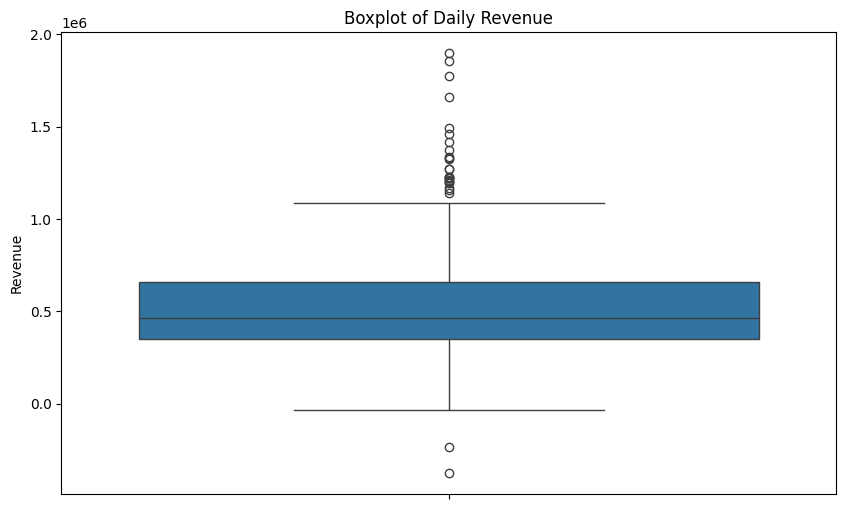

The minimum daily revenue is -376219.503
The maximum daily revenue is 1898881.3
The median of the daily revenues is 466458.75
The first quartile of daily revenues is 351482.8625
The third quartile of daily revenues is 659609.775
There are 26 outliers in the revenue data


In [225]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot of the 'Revenue' column
plt.figure(figsize=(10,6))
sns.boxplot(daily_revenue['Revenue'])
plt.title('Boxplot of Daily Revenue')
plt.show()

# Analysis of data
min_revenue = daily_revenue['Revenue'].min()
max_revenue = daily_revenue['Revenue'].max()
median_revenue = daily_revenue['Revenue'].median()
first_quartile = np.percentile(daily_revenue['Revenue'], 25)
third_quartile = np.percentile(daily_revenue['Revenue'], 75)
IQR = third_quartile - first_quartile

num_outliers = daily_revenue[(daily_revenue['Revenue'] < (first_quartile - 1.5 * IQR)) | (daily_revenue['Revenue'] > (third_quartile + 1.5 * IQR))].shape[0]

# Display the analysis
print(f"The minimum daily revenue is {min_revenue}")
print(f"The maximum daily revenue is {max_revenue}")
print(f"The median of the daily revenues is {median_revenue}")
print(f"The first quartile of daily revenues is {first_quartile}")
print(f"The third quartile of daily revenues is {third_quartile}")
print(f"There are {num_outliers} outliers in the revenue data")

In [226]:
# Identify the outlier days
outlier_days = daily_revenue[(daily_revenue['Revenue'] < (first_quartile - 1.5 * IQR)) | 
                             (daily_revenue['Revenue'] > (third_quartile + 1.5 * IQR))]

# Identify days below the first quartile and above the third quartile
low_days = daily_revenue[daily_revenue['Revenue'] < first_quartile]
high_days = daily_revenue[daily_revenue['Revenue'] > third_quartile]

# Concatenate all the dataframes of interest
all_days_to_investigate = pd.concat([outlier_days, low_days, high_days])

# Remove any duplicates 
all_days_to_investigate = all_days_to_investigate.drop_duplicates()

# Write to an Excel file
all_days_to_investigate.to_excel("./Output/days_to_investigate.xlsx", index=False)

# Create a function that describes the reason for investigation
def reason_for_investigation(row, first_quartile, third_quartile, lower_bound, upper_bound):
    revenue = row['Revenue']
    if revenue < lower_bound or revenue > upper_bound:
        return 'Outlier'
    elif revenue < first_quartile:
        return 'Below First Quartile'
    elif revenue > third_quartile:
        return 'Above Third Quartile'
    else:
        return 'Normal'

# Calculate the outlier lower and upper bound
lower_bound = first_quartile - 1.5 * IQR
upper_bound = third_quartile + 1.5 * IQR

# Apply the function to each row in the DataFrame
all_days_to_investigate['Description'] = all_days_to_investigate.apply(reason_for_investigation, 
                                                                      args=(first_quartile, third_quartile, lower_bound, upper_bound), 
                                                                      axis=1)

# Sort the DataFrame by 'Description' and absolute 'Revenue', then group by 'Description'
sorted_days = all_days_to_investigate.assign(AbsRevenue=all_days_to_investigate['Revenue'].abs()).sort_values(['Description', 'AbsRevenue'], ascending=[True, False]).groupby('Description')

# Function to get the top 5 rows of each group
def top_5_days(group):
    return group.head(5)

# Apply the function to each group to get the top 5 days
top_days = sorted_days.apply(top_5_days)
# Save the DataFrame to an Excel file
top_days.to_excel("./Output/top_days_to_investigate.xlsx", index=False)

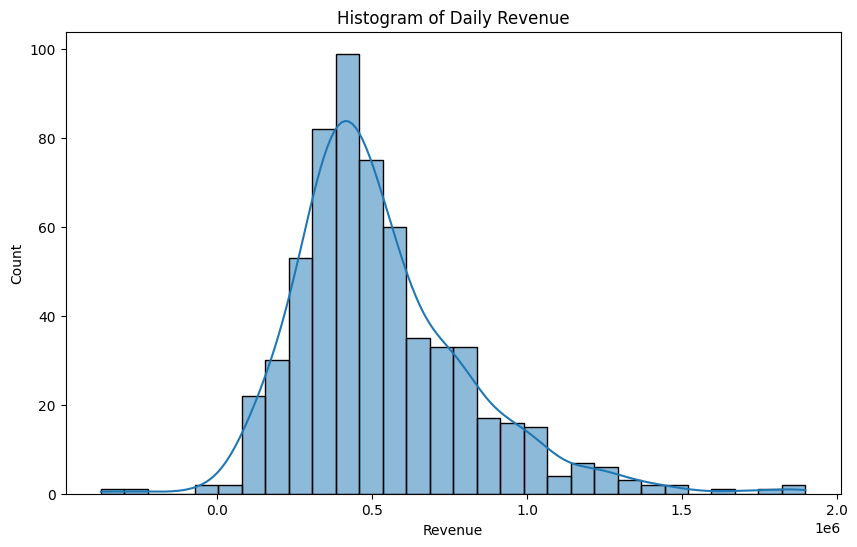

The average daily revenue is approximately 528143.52.
The median daily revenue is 466458.75.
The most common daily revenue is -376219.50.
The distribution of daily revenue is right-skewed, meaning that most of the daily revenues are on the lower side and there are some days with exceptionally high revenues.


In [227]:
# Create a histogram of the 'Revenue' column
plt.figure(figsize=(10,6))
sns.histplot(daily_revenue['Revenue'], bins=30, kde=True)
plt.title('Histogram of Daily Revenue')
plt.title('Histogram of Daily Revenue')
plt.show()

# Calculate basic statistics
revenue_mean = daily_revenue['Revenue'].mean()
revenue_median = daily_revenue['Revenue'].median()
revenue_mode = daily_revenue['Revenue'].mode()[0]

print(f"The average daily revenue is approximately {revenue_mean:.2f}.")
print(f"The median daily revenue is {revenue_median:.2f}.")
if revenue_mode:
    print(f"The most common daily revenue is {revenue_mode:.2f}.")
else:
    print("There is no single mode in the data.")

# Check for skewness
skewness = daily_revenue['Revenue'].skew()
if skewness > 0:
    print("The distribution of daily revenue is right-skewed, meaning that most of the daily revenues are on the lower side and there are some days with exceptionally high revenues.")
elif skewness < 0:
    print("The distribution of daily revenue is left-skewed, meaning that most of the daily revenues are on the higher side and there are some days with exceptionally low revenues.")
else:
    print("The distribution of daily revenues is approximately symmetrical about the mean.")

In [228]:
# Convert InvoiceDate to datetime
retail_CPI['InvoiceDate'] = pd.to_datetime(retail_CPI['InvoiceDate'])

# Extract year and month
retail_CPI['InvoiceYearMonth'] = retail_CPI['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m')) 

# Calculate monthly Revenue
monthly_revenue = retail_CPI.groupby('InvoiceYearMonth')['Revenue'].sum().reset_index()

# Print out the monthly revenue
print(monthly_revenue)

   InvoiceYearMonth    Revenue
0           2009-12 13,476,598
1           2010-01 10,542,241
2           2010-02  8,995,002
3           2010-03 12,934,787
4           2010-04  9,954,641
5           2010-05 10,346,793
6           2010-06 11,448,326
7           2010-07  9,708,129
8           2010-08 11,080,431
9           2010-09 14,391,483
10          2010-10 17,609,546
11          2010-11 23,893,760
12          2010-12 12,541,409
13          2011-01  9,441,202
14          2011-02  8,433,660
15          2011-03 11,565,724
16          2011-04  8,349,720
17          2011-05 12,252,382
18          2011-06 11,654,510
19          2011-07 11,540,392
20          2011-08 11,559,946
21          2011-09 17,246,350
22          2011-10 18,112,390
23          2011-11 24,604,429
24          2011-12  7,314,833


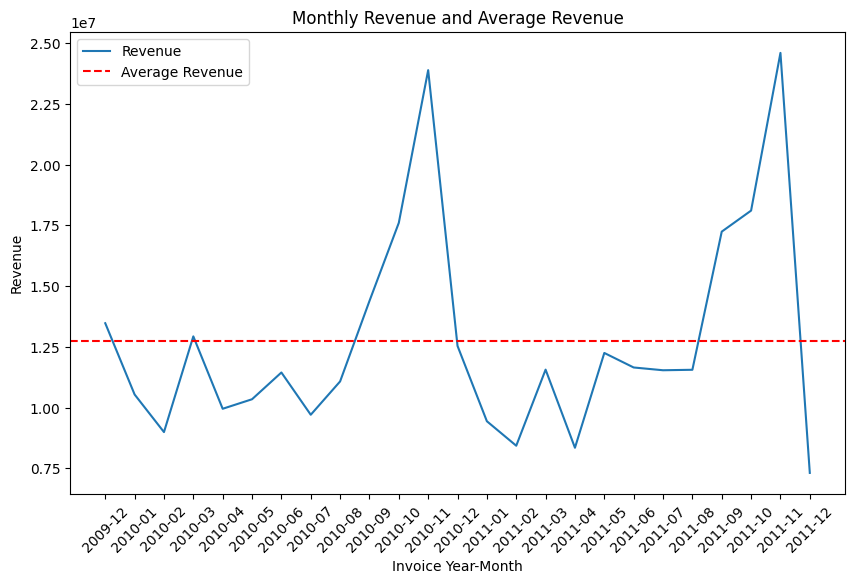

In [229]:
# Plotting the monthly revenue over time
plt.figure(figsize=(10,6))

# Plotting the monthly revenue over time
plt.plot(monthly_revenue['InvoiceYearMonth'], monthly_revenue['Revenue'], label='Revenue')

# Calculate and plot the average monthly revenue
average_revenue = monthly_revenue['Revenue'].mean()
plt.axhline(y=average_revenue, color='r', linestyle='--', label='Average Revenue')

plt.xlabel('Invoice Year-Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue and Average Revenue')
plt.xticks(rotation=45) # Makes the x-axis labels more readable
plt.legend()

plt.show()

In [230]:
# Calculate monthly revenue
monthly_revenue = retail_CPI.groupby('InvoiceDate')['Revenue'].sum().reset_index()

# Calculate the number of unique customers per month
monthly_customers = retail_CPI.groupby('InvoiceDate')['Customer ID'].nunique().reset_index()
monthly_customers.columns = ['InvoiceDate', 'CustomerCount']

# Merge the two dataframes
monthly_data = pd.merge(monthly_revenue, monthly_customers, on='InvoiceDate')

# Calculate the correlation
correlation = monthly_data['Revenue'].corr(monthly_data['CustomerCount'])

# Print the correlation result
print(f"The correlation between monthly revenue and number of customers is: {correlation}")

# Interpret correlation results
if correlation > 0.7:
    interpretation = 'Strong positive correlation: An increase in monthly revenue tends to correspond with an increase in number of customers.'
elif correlation > 0:
    interpretation = 'Weak positive correlation: An increase in monthly revenue slightly corresponds with an increase in number of customers.'
elif correlation > -0.7:
    interpretation = 'Weak negative correlation: An increase in monthly revenue slightly corresponds with a decrease in number of customers.'
else:
    interpretation = 'Strong negative correlation: An increase in monthly revenue tends to correspond with a decrease in number of customers.'

# Print the interpretation
print(interpretation)

The correlation between monthly revenue and number of customers is: 0.6736266338229036
Weak positive correlation: An increase in monthly revenue slightly corresponds with an increase in number of customers.


In [231]:
print(retail_CPI.head(1))

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   

  InvoiceDate  Price  Customer ID         Country  Year  CPI  Revenue  \
0  2009-12-01      7       13,085  United Kingdom  2009   87       83   

  InvoiceYearMonth  
0          2009-12  


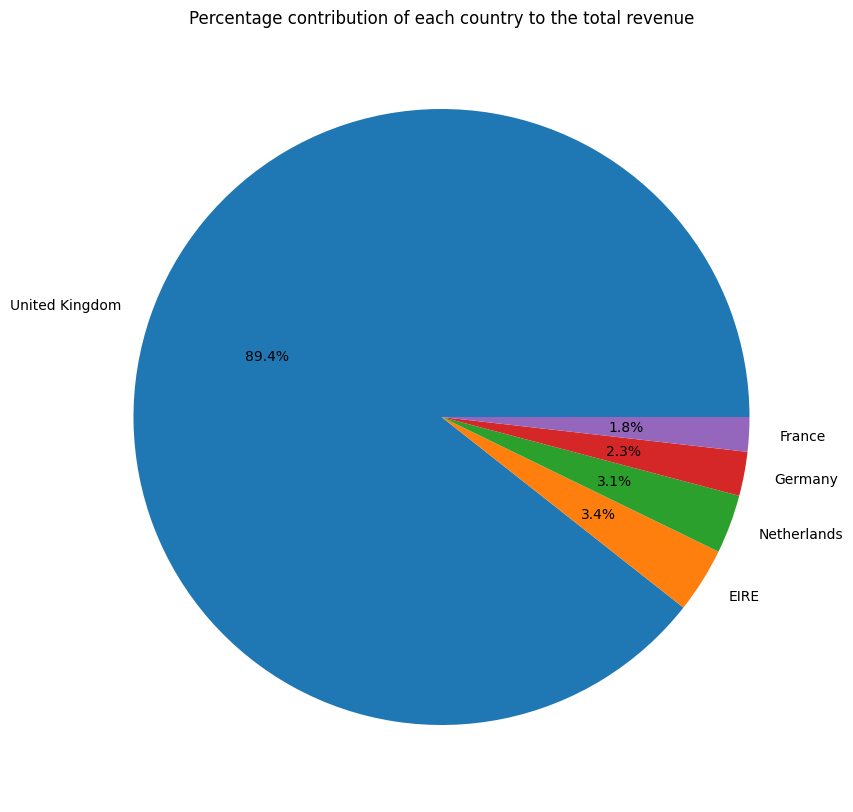

In [232]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total revenue
total_revenue = retail_CPI['Revenue'].sum()

# Calculate the percentage contribution of each country to total revenue
sales_country_percentage = retail_CPI.groupby('Country')['Revenue'].sum() / total_revenue * 100

# sort in descending order to know the biggest contributors
sales_country_percentage = sales_country_percentage.sort_values(ascending=False)

# You may also want to focus on countries which contribute to a significant portion of the revenue
significant_sales_countries = sales_country_percentage[sales_country_percentage > 1]  # you can change this threshold

# Creating plot
plt.figure(figsize=(10,10)) 
plt.pie(significant_sales_countries, labels = significant_sales_countries.index, autopct='%1.1f%%')

# Add title
plt.title("Percentage contribution of each country to the total revenue")

# Show plot
plt.show()

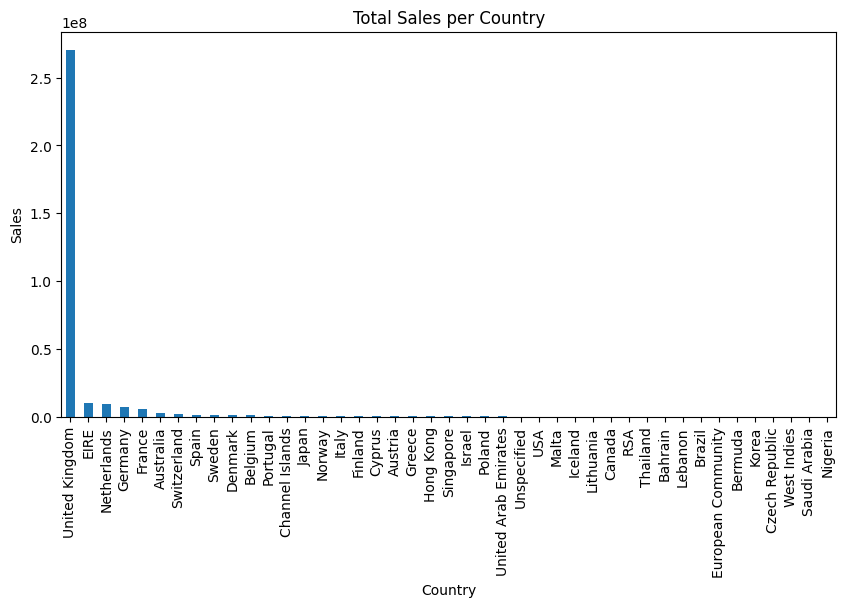

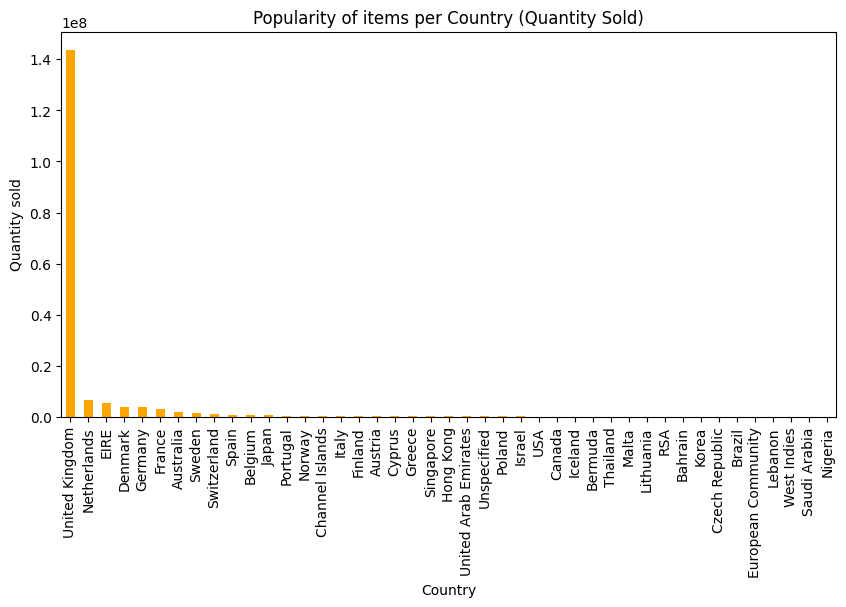

In [233]:
import pandas as pd
import matplotlib.pyplot as plt

# Total Sales per country
sales_country = retail_CPI.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Popularity (quantity sold) per country
popularity_country = retail_CPI.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Plotting Sales Data
plt.figure(figsize=(10,5))
sales_country.plot(kind ='bar')
plt.title('Total Sales per Country')
plt.ylabel('Sales')
plt.xlabel('Country')
plt.show()

# Plotting Popularity Data
plt.figure(figsize=(10,5))
popularity_country.plot(kind ='bar', color='orange')
plt.title('Popularity of items per Country (Quantity Sold)')
plt.ylabel('Quantity sold')
plt.xlabel('Country')
plt.show()

In [234]:

# Total Sales per country
sales_country = retail_CPI.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Popularity (quantity sold) per country
popularity_country = retail_CPI.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# find the countries where there's high revenue but low quantities sold (high_value_countries)
high_value_countries = sales_country.index[sales_country > sales_country.mean()]
low_quantity_countries = popularity_country.index[popularity_country < popularity_country.mean()]
high_value_low_quantity_countries = np.intersect1d(high_value_countries, low_quantity_countries)

# interpret high value, low quantity
if high_value_low_quantity_countries.any():  # if there are any such countries
    print('The following countries have higher than average revenue but lower than average quantities sold: ')
    print(high_value_low_quantity_countries)
    print('This might suggest that these countries are purchasing higher-priced items in lower quantities. It would be good to focus on marketing premium products in these regions.')
else:
    print('There are no countries with higher than average revenue and lower than average quantities sold.')

# find the countries where there's low revenue but high quantities sold (low_value_countries)
low_value_countries = sales_country.index[sales_country < sales_country.mean()]
high_quantity_countries = popularity_country.index[popularity_country > popularity_country.mean()]
low_value_high_quantity_countries = np.intersect1d(low_value_countries, high_quantity_countries)

# interpret low value, high quantity
if low_value_high_quantity_countries.any():  # if there are any such countries
    print('\nThe following countries have lower than average revenue but higher than average quantities sold: ')
    print(low_value_high_quantity_countries)
    print('This could mean that these countries are purchasing lower-priced items in high quantities. It might be beneficial to market more budget-friendly products in these regions.')
else:
    print('There are no countries with lower than average revenue and higher than average quantities sold.')

There are no countries with higher than average revenue and lower than average quantities sold.
There are no countries with lower than average revenue and higher than average quantities sold.


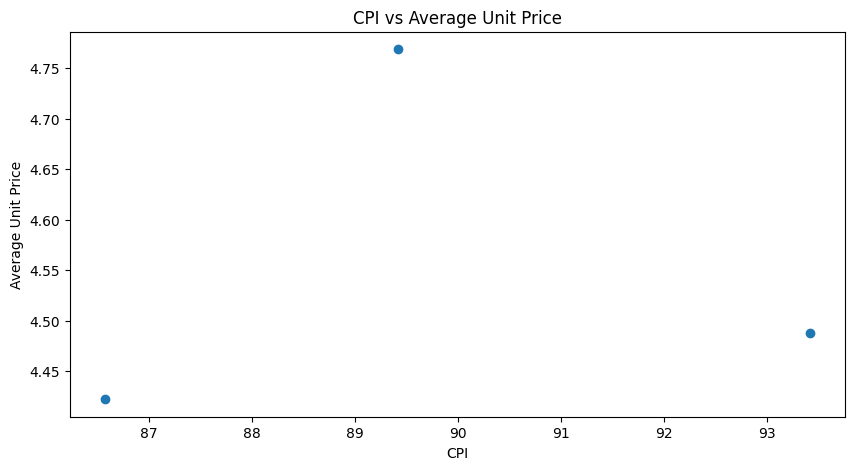

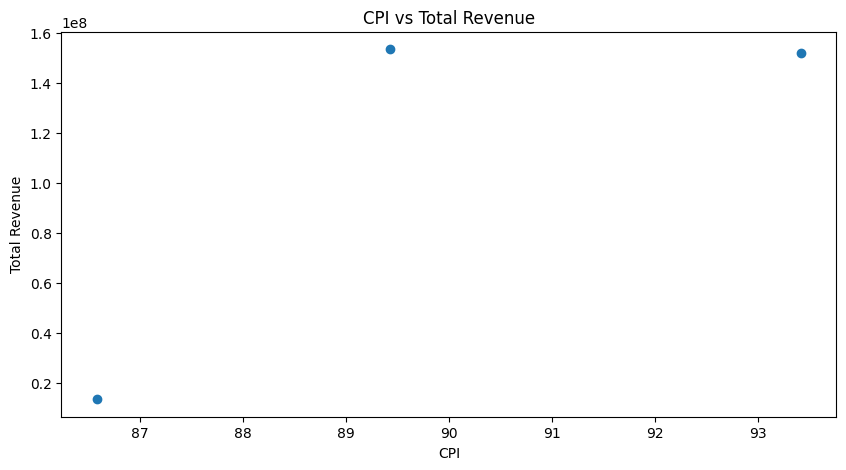

In [235]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and calculate average CPI, average price, and total revenue
yearly_data = retail_CPI.groupby('Year').agg({'CPI': 'mean', 'Price': 'mean', 'Revenue': 'sum'}).reset_index()

# Plotting CPI against average Price
plt.figure(figsize=(10,5))
plt.scatter(yearly_data['CPI'], yearly_data['Price'])
plt.title('CPI vs Average Unit Price')
plt.xlabel('CPI')
plt.ylabel('Average Unit Price')
plt.show()

# Plotting CPI against total Revenue
plt.figure(figsize=(10,5))
plt.scatter(yearly_data['CPI'], yearly_data['Revenue'])
plt.title('CPI vs Total Revenue')
plt.xlabel('CPI')
plt.ylabel('Total Revenue')
plt.show()

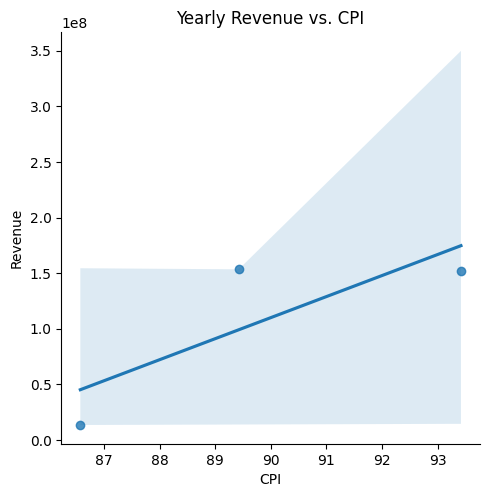

The correlation between yearly CPI and Revenue is 0.81, indicating a positive relationship.
This relationship is not statistically significant.


In [236]:
import matplotlib.dates as mdates
from scipy.stats import linregress

## Yearly Data Analysis

# Calculate yearly mean of CPI, and sum of Revenue
yearly_data = retail_CPI.groupby('Year').agg({'CPI': 'mean', 'Revenue': 'sum'}).reset_index()

# Plotting CPI against Revenue with a regression line
sns.lmplot( data=yearly_data, x="CPI", y="Revenue")
plt.title("Yearly Revenue vs. CPI")
plt.xlabel("CPI")
plt.ylabel("Revenue")
plt.show()

# Add interpretation
slope, intercept, r_value, p_value, std_err = linregress(yearly_data['CPI'], yearly_data['Revenue'])
print("The correlation between yearly CPI and Revenue is {:.2f}, indicating a {} relationship.".format(r_value, "positive" if r_value > 0 else "negative"))
if p_value < 0.05:
    print("This relationship is statistically significant.")
else:
    print("This relationship is not statistically significant.")

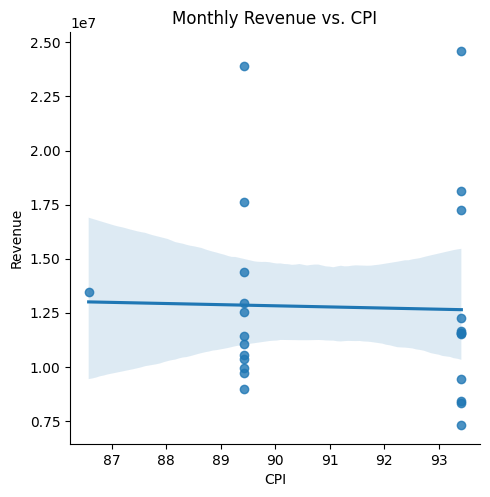

The correlation between monthly CPI and Revenue is -0.03, indicating a negative relationship.
This relationship is not statistically significant.


In [237]:
## Monthly Data Analysis

# Calculate monthly mean of CPI, sum of  Revenue
monthly_data = retail_CPI.copy()
monthly_data['InvoiceMonth'] = pd.to_datetime(monthly_data['InvoiceDate']).dt.to_period('M')
monthly_data = monthly_data.groupby('InvoiceMonth').agg({'CPI': 'mean', 'Revenue': 'sum'}).reset_index()

# Plotting CPI against Revenue with a regression line for each month
sns.lmplot(data=monthly_data, x="CPI", y="Revenue")
plt.title("Monthly Revenue vs. CPI")
plt.xlabel("CPI")
plt.ylabel("Revenue")
plt.show()

# Add interpretation
slope, intercept, r_value, p_value, std_err = linregress(monthly_data['CPI'], monthly_data['Revenue'])
print("The correlation between monthly CPI and Revenue is {:.2f}, indicating a {} relationship.".format(r_value, "positive" if r_value > 0 else "negative"))
if p_value < 0.05:
    print("This relationship is statistically significant.")
else:
    print("This relationship is not statistically significant.")

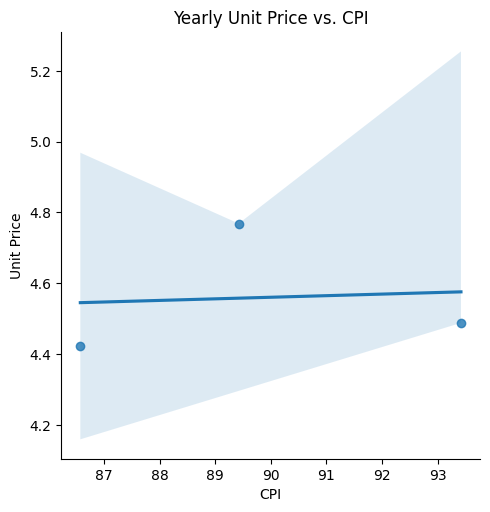

The correlation between yearly CPI and Unit Price is 0.08, indicating a positive relationship.
This relationship is not statistically significant.


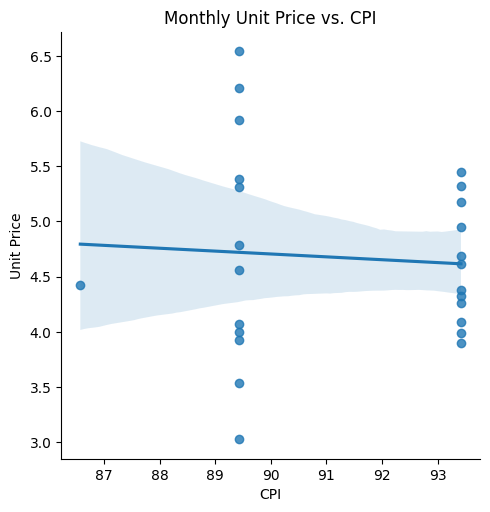

The correlation between monthly CPI and Unit Price is -0.07, indicating a negative relationship.
This relationship is not statistically significant.


In [238]:
## Yearly Data Analysis

# Calculate yearly mean of CPI, and mean of Price
yearly_data = retail_CPI.groupby('Year').agg({'CPI': 'mean', 'Price': 'mean'}).reset_index()

# Plotting CPI against Price with a regression line
sns.lmplot(data=yearly_data, x="CPI", y="Price")
plt.title("Yearly Unit Price vs. CPI")
plt.xlabel("CPI")
plt.ylabel("Unit Price")
plt.show()

# Add interpretation
slope, intercept, r_value, p_value, std_err = linregress(yearly_data['CPI'], yearly_data['Price'])
print("The correlation between yearly CPI and Unit Price is {:.2f}, indicating a {} relationship.".format(r_value, "positive" if r_value > 0 else "negative"))
if p_value < 0.05:
    print("This relationship is statistically significant.")
else:
    print("This relationship is not statistically significant.")


## Monthly Data Analysis

# Calculate monthly mean of CPI, and mean of Price
monthly_data = retail_CPI.copy()
monthly_data['InvoiceMonth'] = pd.to_datetime(monthly_data['InvoiceDate']).dt.to_period('M')
monthly_data = monthly_data.groupby('InvoiceMonth').agg({'CPI': 'mean', 'Price': 'mean'}).reset_index()

# Plotting CPI vs Price with a regression line for each month
sns.lmplot(data=monthly_data, x="CPI", y="Price")
plt.title("Monthly Unit Price vs. CPI")
plt.xlabel("CPI")
plt.ylabel("Unit Price")
plt.show()

# Add interpretation
slope, intercept, r_value, p_value, std_err = linregress(monthly_data['CPI'], monthly_data['Price'])
print("The correlation between monthly CPI and Unit Price is {:.2f}, indicating a {} relationship.".format(r_value, "positive" if r_value > 0 else "negative"))
if p_value < 0.05:
    print("This relationship is statistically significant.")
else:
    print("This relationship is not statistically significant.")

In [239]:
import pandas as pd

# Grouping the data by Invoice and then create a list of items
baskets = retail_CPI.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice')

# Show the most popular items
popular_items = pd.DataFrame(baskets.apply(max).sort_values(ascending=False))
popular_items.columns = ['Quantity']
print(popular_items.head())

# Show the invoices with the most items
popular_invoices = pd.DataFrame(baskets.apply(sum, axis=1).sort_values(ascending=False))
popular_invoices.columns = ['Quantity']
print(popular_invoices.head())

                                    Quantity
Description                                 
PAPER CRAFT , LITTLE BIRDIE        1,376,915
MEDIUM CERAMIC TOP STORAGE JAR     1,261,655
BLACK AND WHITE PAISLEY FLOWER MUG   325,584
SET/6 STRAWBERRY PAPER CUPS          220,320
SET/6 WOODLAND PAPER PLATES          220,320
         Quantity
Invoice          
518505  1,481,839
524174  1,481,839
497946  1,424,158
581483  1,376,915
541431  1,261,655


                                    Quantity
Description                                 
PAPER CRAFT , LITTLE BIRDIE        1,376,915
MEDIUM CERAMIC TOP STORAGE JAR     1,261,655
BLACK AND WHITE PAISLEY FLOWER MUG   325,584
SET/6 STRAWBERRY PAPER CUPS          220,320
SET/6 WOODLAND PAPER PLATES          220,320
         Quantity
Invoice          
524174  1,481,839
518505  1,481,839
497946  1,424,158
581483  1,376,915
541431  1,261,655


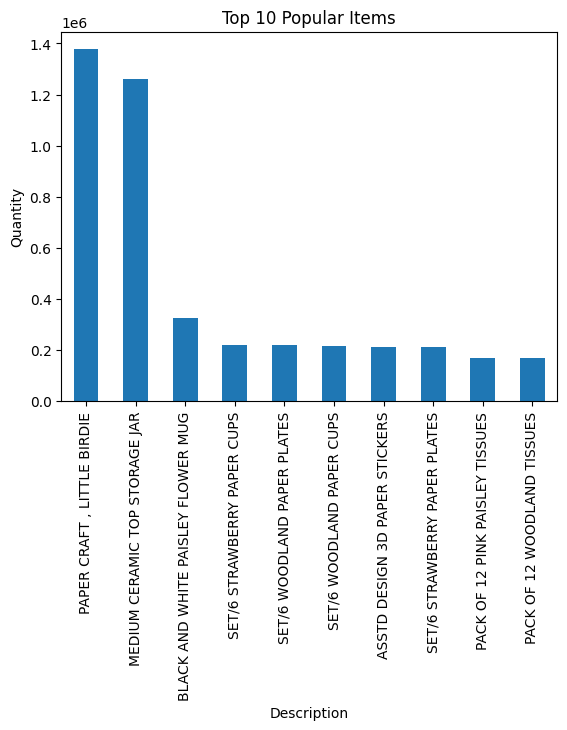

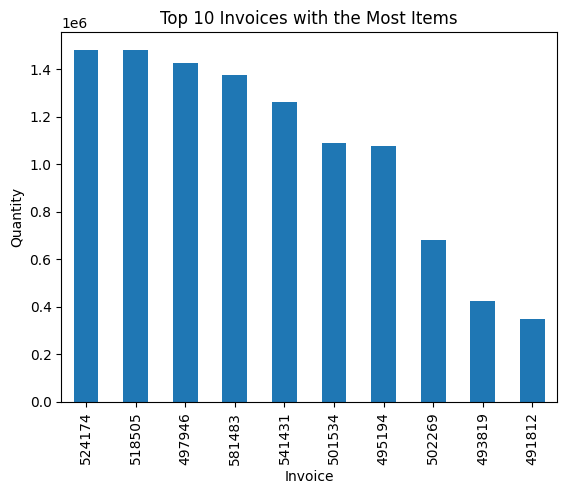

In [240]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the DataFrame
retail_CPI_copy = retail_CPI.copy()

retail_CPI_copy.dropna(axis=0, subset=['Invoice'], inplace=True)
retail_CPI_copy['Invoice'] = retail_CPI_copy['Invoice'].astype('str')
retail_CPI_copy = retail_CPI_copy[~retail_CPI_copy['Invoice'].str.contains('C')]
retail_CPI_copy['Description'] = retail_CPI_copy['Description'].str.strip()

# Group the data by Invoice and then create a list of items
baskets = retail_CPI_copy.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice')

# Show the most popular items
popular_items = pd.DataFrame(baskets.apply(max).sort_values(ascending=False))
popular_items.columns = ['Quantity']
print(popular_items.head())

# Show the invoices with the most items
popular_invoices = pd.DataFrame(baskets.apply(sum, axis=1).sort_values(ascending=False))
popular_invoices.columns = ['Quantity']
print(popular_invoices.head())

# Visualization of the most popular items
popular_items.head(10).plot(kind='bar', legend=None)
plt.title("Top 10 Popular Items")
plt.ylabel('Quantity')
plt.show()

# Visualization of the invoices with the most items
popular_invoices.head(10).plot(kind='bar', legend=None)
plt.title("Top 10 Invoices with the Most Items")
plt.ylabel('Quantity')
plt.show()

In [241]:
# Create a copy of the DataFrame
retail_CPI_copy = retail_CPI.copy()

# Create 'Year' and 'Month' columns
retail_CPI_copy['Year'] = retail_CPI_copy['InvoiceDate'].dt.year
retail_CPI_copy['Month'] = retail_CPI_copy['InvoiceDate'].dt.month

# Filter data for returned items (negative quantities)
returned_items = retail_CPI_copy[retail_CPI_copy['Quantity'] < 0]

# Calculate the total quantity returned for each item by year and month
returned_items_grouped = returned_items.groupby(['Description', 'Year', 'Month']).agg({'Quantity': 'count'}).sort_values(by='Quantity', ascending=False)

# Rename the column for clarity
returned_items_grouped.columns = ['Return_Count']

# Display the data
print(returned_items_grouped)

                                          Return_Count
Description                   Year Month              
WHITE CHERRY LIGHTS           2010 5              1258
check                         2011 11             1241
PINK CHERRY LIGHTS            2010 5               731
Manual                        2010 3               731
                                   9               663
...                                                ...
GROW YOUR OWN PLANT IN A CAN  2010 7                17
                                   11               17
                                   12               17
                              2011 3                17
wrongly sold sets             2011 3                17

[11392 rows x 1 columns]


In [242]:
# Calculate historical return rate
total_quantities = retail_CPI['Quantity'].abs().sum() # taking absolute value since returned quantity is negative
returned_quantities = retail_CPI[retail_CPI['Quantity'] < 0]['Quantity'].abs().sum() # summing up all returned quantities
historical_return_rate = returned_quantities / total_quantities

# Assume a forecasted future sales (You should replace with actual forecast)
forecasted_sales = 1000000

# Calculate expected return provision
expected_return_provisions = historical_return_rate * forecasted_sales

print("Expected Return Provisions: ", expected_return_provisions)

Expected Return Provisions:  83932.53502699384


In [243]:
# Filter data for returned items (negative quantities)
returned_items = retail_CPI[retail_CPI['Quantity'] < 0]

# Calculate the total quantity returned for each item
returned_items_by_description = returned_items.groupby('Description').agg({'Quantity': 'count'}).sort_values(by='Quantity', ascending=False)

# Rename the column for clarity
returned_items_by_description.columns = ['Return_Count']

# Display the top 10 most returned items
print(returned_items_by_description.head(10))

                                    Return_Count
Description                                     
Manual                                      8415
REGENCY CAKESTAND 3 TIER                    5797
POSTAGE                                     3842
BAKING SET 9 PIECE RETROSPOT                3553
STRAWBERRY CERAMIC TRINKET BOX              3026
Discount                                    2482
WHITE HANGING HEART T-LIGHT HOLDER          2278
check                                       2057
WHITE CHERRY LIGHTS                         2023
RED RETROSPOT CAKE STAND                    1802


In [244]:
# Convert the 'InvoiceDate' column to datetime format
retail_CPI['InvoiceDate'] = pd.to_datetime(retail_CPI['InvoiceDate'])

# Create separate 'Year' and 'Month' columns
retail_CPI['Year'] = retail_CPI['InvoiceDate'].dt.year
retail_CPI['Month'] = retail_CPI['InvoiceDate'].dt.month

# Identify returned items (assuming they have negative quantities)
returned_items = retail_CPI[retail_CPI['Quantity'] < 0]

# Group by 'Year' and 'Month', and calculate total 'Quantity' and 'Revenue'
returns_by_month = returned_items.groupby(['Year', 'Month']).agg({'Quantity': 'sum', 'Revenue': 'sum'})

# Take the absolute values to get total returned quantities and revenue
returns_by_month['Quantity'] = returns_by_month['Quantity'].abs()
returns_by_month['Revenue'] = returns_by_month['Revenue'].abs()

# Rename the columns for clarity
returns_by_month.columns = ['Total_Returned_Quantity', 'Total_Returned_Revenue']


# Group by 'Year' and calculate total 'Quantity' and 'Revenue'
returns_by_year = returned_items.groupby('Year').agg({'Quantity': 'sum', 'Revenue': 'sum'})

# Convert to absolute values to get total returned quantities and revenue
returns_by_year['Quantity'] = returns_by_year['Quantity'].abs()
returns_by_year['Revenue'] = returns_by_year['Revenue'].abs()

# Rename the columns for clarity
returns_by_year.columns = ['Total_Returned_Quantity', 'Total_Returned_Revenue']

# Calculate the grand total
grand_total = pd.DataFrame(returns_by_year.sum()).transpose()

# Set the index for the total row
grand_total.index = ['Grand Total']

# Combine the original dataframe and the grand total row
returns_by_year = pd.concat([returns_by_year, grand_total])

# Display the DataFrame
print(returns_by_year)
# Display the DataFrame
print(returns_by_month)

             Total_Returned_Quantity  Total_Returned_Revenue
2009                         429,233                 422,016
2010                       9,467,759              10,427,056
2011                       7,840,196              13,719,196
Grand Total               17,737,188              24,568,269
            Total_Returned_Quantity  Total_Returned_Revenue
Year Month                                                 
2009 12                      429233                 422,016
2010 1                       349537                 486,606
     2                       414120                 350,420
     3                       716448               1,142,115
     4                       599403                 625,486
     5                      1040553                 752,425
     6                       463267               1,208,641
     7                       975919                 532,290
     8                      1206728                 687,914
     9                      1963806

In [245]:
# Returned items total Quantity and Revenue for each year
returns_by_year = returned_items.groupby('Year').agg({'Quantity': 'sum', 'Revenue': 'sum'})

# Convert to absolute values
returns_by_year['Quantity'] = returns_by_year['Quantity'].abs()
# removing the absolute conversion on 'Revenue' as per your instruction
#returns_by_year['Revenue'] = returns_by_year['Revenue'].abs() 

# Rename columns for clarity
returns_by_year.columns = ['Total_Returned_Quantity', 'Total_Returned_Revenue']

# Adding grand total
total_returned_quantity = returns_by_year['Total_Returned_Quantity'].sum()
total_returned_revenue = returns_by_year['Total_Returned_Revenue'].sum()

print(returns_by_year)

print("Grand Total Quantity Returned:", total_returned_quantity)
print("Grand Total Revenue from Returns:", total_returned_revenue)

      Total_Returned_Quantity  Total_Returned_Revenue
Year                                                 
2009                   429233                -422,016
2010                  9467759             -10,427,056
2011                  7840196             -13,719,196
Grand Total Quantity Returned: 17737188
Grand Total Revenue from Returns: -24568268.59


In [246]:
print(returned_items['Revenue'])

3026       -35
3027       -35
3028       -35
3029       -35
3030       -35
            ..
17360939    -6
17360940    -6
17360941    -6
17360942    -6
17360943    -6
Name: Revenue, Length: 379134, dtype: float64


In [247]:
# Create a copy of the DataFrame
retail_CPI_copy = retail_CPI.copy()

# Check the original revenue calculation
retail_CPI_copy['Calculated_Revenue'] = retail_CPI_copy['Quantity'] * retail_CPI_copy['Price']

# Compare the original 'Revenue' column to 'Calculated_Revenue'
comparison = (retail_CPI_copy['Revenue'] == retail_CPI_copy['Calculated_Revenue'])

# It prints 'True' if they're exactly the same, and 'False' if they're not
print(comparison)

# See how many 'False' values are there, which shows where the Revenue does not match Quantity * Price
print("Number of mismatches in Revenue Calculation: ", sum(~comparison))

0           True
1           True
2           True
3           True
4           True
            ... 
17364203    True
17364204    True
17364205    True
17364206    True
17364207    True
Length: 17364208, dtype: bool
Number of mismatches in Revenue Calculation:  0


In [248]:
import pandas as pd
from IPython.display import display

# Set Display format to use comma separator
pd.options.display.float_format = '{:,.0f}'.format

# Create a copy of the DataFrame
retail_CPI_copy = retail_CPI.copy()

# Define returned items as those with negative Quantity
returned_items = retail_CPI_copy[retail_CPI_copy['Quantity'] < 0].copy()

# Compute Revenue as Quantity * Price again on retail_CPI_copy
retail_CPI_copy['Revenue'] = retail_CPI_copy['Quantity'] * retail_CPI_copy['Price']

# Compute Revenue as Quantity * Price on returned_items
returned_items.loc[:, 'Revenue'] = returned_items['Quantity'] * returned_items['Price']

# Proceed with your groupby operation
returns_by_year = returned_items.groupby('Year').agg({'Quantity': 'sum', 'Revenue': 'sum'})

# Calculate grand total for Quantity and Revenue
total = returns_by_year.sum()

# Create a DataFrame from total and name the index as 'Grand Total'
total_df = pd.DataFrame(total).T
total_df.index = ['Grand Total']

# Concatenate Grand Total row to the DataFrame
returns_by_year = pd.concat([returns_by_year, total_df])

# Print heading for the table
print("\n Returns by Year")
# Display it as a table
display(returns_by_year)


 Returns by Year


,Quantity,Revenue
2009,"-429,233","-422,016"
2010,"-9,467,759","-10,427,056"
2011,"-7,840,196","-13,719,196"
Grand Total,"-17,737,188","-24,568,269"
